In [1]:
import pandas as pd
import pandas_datareader as pdr

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import datetime as dt

In [2]:
start_date = dt.datetime(2000,1,1)
end_date = dt.datetime.now()

In [3]:
# Refer to this page to see what states are in what census region https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf

south_census_df = pdr.fred.FredReader(['CSOUPOP', 'MEFAINUSSOA646N', 'MAPAINUSSOA646N'], start=start_date, end=end_date).read()
south_census_df['Total_pop'] = south_census_df['CSOUPOP'] * 1000

texas_df = pdr.fred.FredReader(['TXPOP', 'MEHOINUSTXA646N', 'MAPAINUSWEA646N'], start=start_date, end=end_date).read()
texas_df['Total_pop'] = texas_df['TXPOP'] * 1000

west_census_df = pdr.fred.FredReader(['CWSTPOP', 'MEFAINUSWEA646N'], start=start_date, end=end_date).read()
west_census_df['Total_pop'] = west_census_df['CWSTPOP'] * 1000

cali_df = pdr.fred.FredReader(['CAPOP', 'MEHOINUSCAA646N'], start=start_date, end=end_date).read()
cali_df['Total_pop'] = cali_df['CAPOP'] * 1000

south_census_df.head()

,CSOUPOP,MEFAINUSSOA646N,Total_pop
DATE,,,
2000-01-01,100565.549,45881,100565549.0
2001-01-01,101849.575,46688,101849575.0
2002-01-01,103150.787,47230,103150787.0
2003-01-01,104380.188,47322,104380188.0
2004-01-01,105883.977,50003,105883977.0


In [4]:
south_census_df['Total'] = south_census_df['CSOUPOP'] * 1000
south_census_df.head()

,CSOUPOP,MEFAINUSSOA646N,Total_pop,Total
DATE,,,,
2000-01-01,100565.549,45881,100565549.0,100565549.0
2001-01-01,101849.575,46688,101849575.0,101849575.0
2002-01-01,103150.787,47230,103150787.0,103150787.0
2003-01-01,104380.188,47322,104380188.0,104380188.0
2004-01-01,105883.977,50003,105883977.0,105883977.0


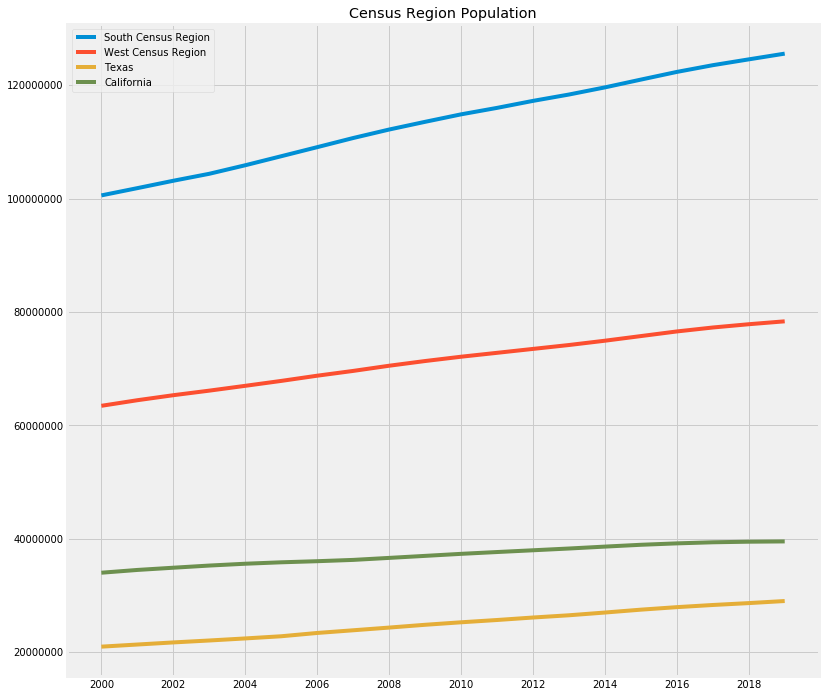

In [5]:
plt.figure(figsize=(12,12))
plt.plot(south_census_df['Total_pop'], label='South Census Region')
plt.plot(west_census_df['Total_pop'], label='West Census Region')
plt.plot(texas_df['Total_pop'], label='Texas')
plt.plot(cali_df['Total_pop'], label='California')
plt.legend()
plt.title('Census Region Population')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

Text(0.5, 1.0, 'Census Region Median Family Income ($)')

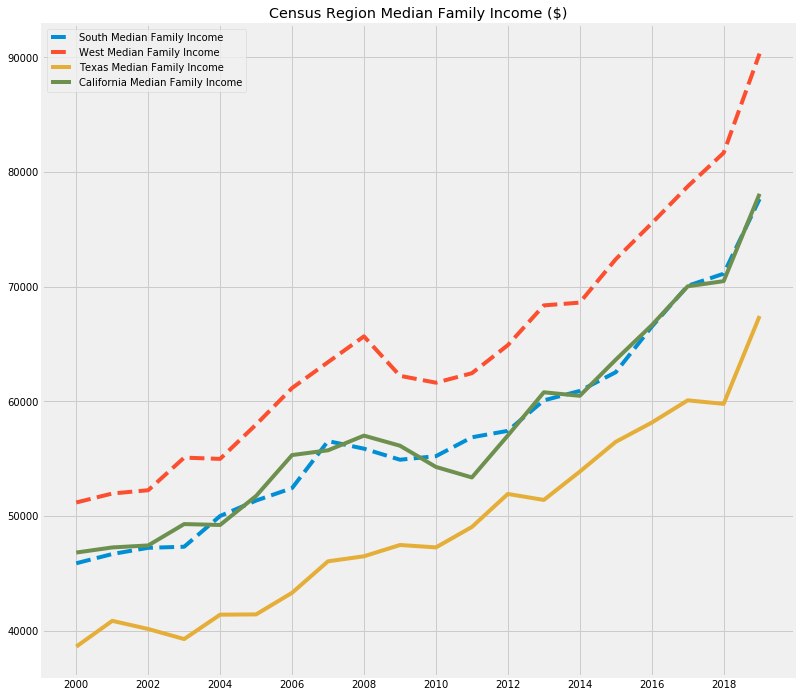

In [11]:
plt.figure(figsize=(12,12))
plt.plot(south_census_df['MEFAINUSSOA646N'], label='South Median Family Income', linestyle='--')
plt.plot(west_census_df['MEFAINUSWEA646N'], label='West Median Family Income', linestyle='--')
plt.plot(texas_df['MEHOINUSTXA646N'], label='Texas Median Family Income')
plt.plot(cali_df['MEHOINUSCAA646N'], label='California Median Family Income')
plt.legend()
plt.title('Census Region Median Family Income ($)')
